# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Training Data.csv'
data_mentah = pd.read_csv(file_path)
data_group = pd.read_csv(file_path)
data_mentah

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [3]:
# melihat informasi awal dari dataset
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# EDA (Exploratory Data Analysis)

## 1. Descriptive Statistics

In [4]:
# melihat informasi awal dari dataset & nilai null
data_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
# memisahkan kolom numerikal & kategorikal
numerikal = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
kategorikal = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# melihat deskripsi kolom kategorikal & nilai unique
data_group.select_dtypes(include='object').nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [6]:
# cek nilai unique di kolom kategorikal
for col in data_group.select_dtypes(include=['object']).columns:
    print(f"{col}: {data_group[col].unique()}")

Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
CITY: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'


In [7]:
# melihat deskripsi kolom numerikal
data_group.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**Kesimpulan dari Descriptive Statistics**
1.  Data terdiri dari 252000 baris and 13 kolom dan tidak ada nilai null
2.  5 kolom dengan variabel kontinu : Income , Age , Experience , Current_Job_years , Current_House_years
3.  8 kolom dengan variabel kategori : ID , Marriage status ,house ownership, car ownership , profession , city , state , Risk flag (target variabel)

## 2. Univariate Analysis

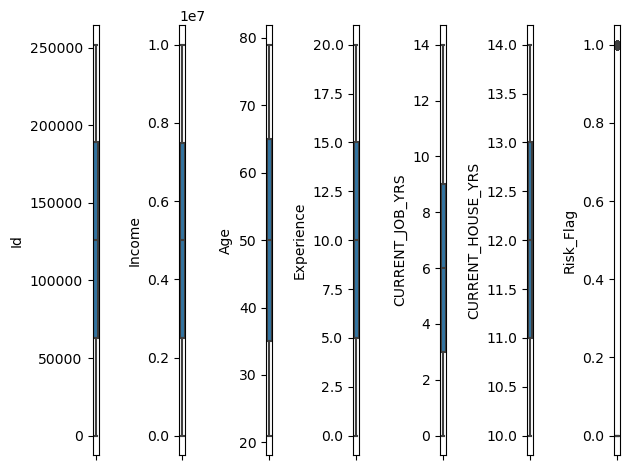

In [8]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan boxplot)

features = numerikal
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data_group[features[i]])
    plt.tight_layout()

Kesimpulan distribusi nilai pada kolom numerik: tidak ada outlier

Tidak adanya outlier menandakan bahwa distribusi data normal

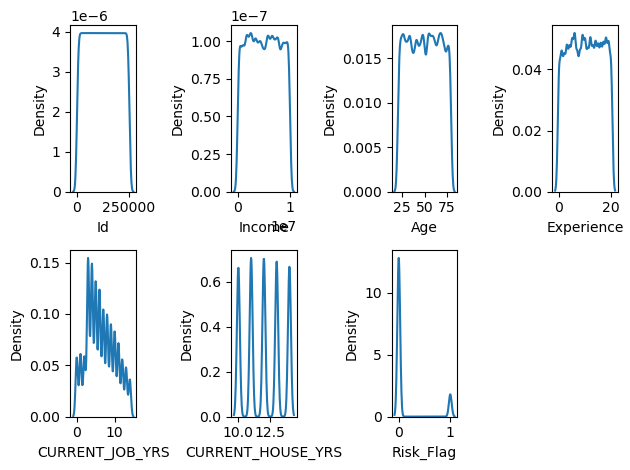

In [9]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan distribution plot)

features = numerikal
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=data_group[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Bentuk distribusi setiap kolom numerik
- Income, age dan experience : uniform distribution, karena data memiliki nilai yang seragam dan tidak terjadi lonjakan sehingga data memiliki probabilitas yang sama
- Current_job_yrs : Skewness positive, ekor distribusi berada di sebelah kanan dengan nilai terbanyak sehingga distribusi sebagian besar berada pada nilai rendah
- current_house_yrs : multimodal distribution curve, karena data memiliki modus yang lebih dari satu

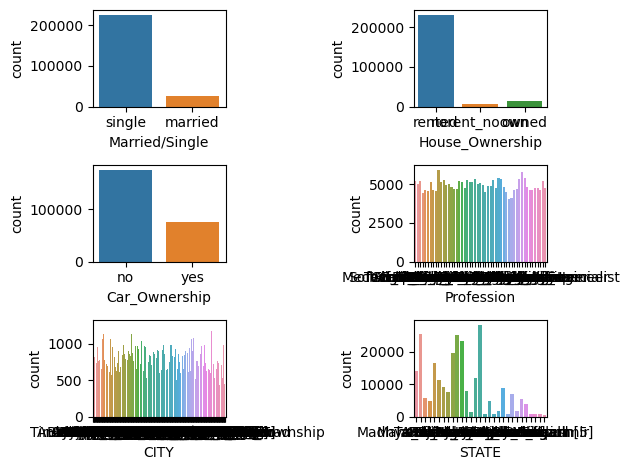

In [10]:
# analisis setiap kolom kategorik untuk melihat distribusi nilai (menggunakan countplot)

features = kategorikal
for i in range(0, len(features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=data_group[features[i]])
    plt.tight_layout()

1. Kolom kategorikal dengan banyak kategori terjadi pada kolom city, state dan profession sehingga data perlu dikelompokan menjadi beberapa kategori yang serupa menjadi satu kategori baru untuk menyederhanakan data.

2. Kolom Kategorikal dengan Dominasi Kategori Tertentu pada kolom married/single, dan house_ownership yang mengindikasikan ketidakseimbangan dalam data sehingga perlu diperhatikan apakah akan memperngaruhi memengaruhi analisis seperti oversampling atau undersampling diperlukan.

In [11]:
# Grouping data per kolom

#Data professions
profession_group = {
    "Healthcare": ['Physician', 'Psychologist', 'Dentist', 'Surgeon'],
    "Research, Engineering & IT": ['Statistician', 'Web_designer', 'Engineer',
                        'Computer_hardware_engineer', 'Drafter', 'Scientist',
                        'Industrial_Engineer', 'Mechanical_engineer',
                        'Chemical_engineer', 'Biomedical_Engineer',
                        'Petroleum_Engineer', 'Technology_specialist',
                        'Design_Engineer', 'Civil_engineer',
                        'Software_Developer', 'Computer_operator', 'Technical_writer',
                        'Graphic_Designer', 'Web_designer', 'Architect', 'Technician',
                        'Microbiologist', 'Geologist', 'Statistican', 'Surveyor'],
    "Finance": ['Financial_Analyst', 'Economist', 'Analyst', 'Chartered_Accountant'],
    "Excecutive": ['Magistrate', 'Consultant','Official','Politican','Lawyer'],
    "Public Service": ['Civil_servant', 'Police_officer', 'Army_officer', 'Hotel_Manager',
                    'Flight_attendant', 'Air_traffic_controller', 'Aviator','Firefighter', 'Chef',
                    'Librarian'],
    "Art & Entertainment": ['Comedian', 'Artist', 'Fashion_Designer']
}

# Data state
state_group = {
    'West Zone': ['Rajasthan', 'Maharashtra', 'Gujarat',
                'Daman & Diu', 'Dadra & Nagar Haveli',
                'Maharashtra', 'Goa', 'Madhya_Pradesh'],
    'South Zone': ['Andhra Pradesh', 'Andhra_Pradesh', 'Karnataka', 'Lakshadweep',
                'Kerala', 'Tamil Nadu', 'Tamil_Nadu', 'Puducherry',
                'Andaman & Nicobar'],
    'North Zone': ['Jammu & Kashmir', 'Jammu_and_Kashmir', 'Himachal Pradesh', 'Himachal_Pradesh', 'Punjab',
                'Chandigarh', 'Uttarakhand', 'Haryana', 'Telangana',
                'Delhi', 'Uttar Pradesh', 'Uttar_Pradesh', 'Uttar_Pradesh[5]'],
    'East Zone': ['Bihar', 'Sikkim', 'Arunachal Pradesh', 'Arunachal_Pradesh',
                'Nagaland', 'Manipur', 'Mizoram',
                'Tripura', 'Meghalaya', 'Assam',
                'West Bengal', 'West_Bengal', 'Jharkhand', 'Odisha',
                'Chhattisgarh']
}

# Data kota
city_group = {
    'Metro': ['Mumbai', 'Delhi_city', 'Kolkata', 'Bangalore', 'Chennai', 'Hyderabad', 'Pune'],
    'Urban': ['Ahmedabad', 'Gurgaon', 'Noida', 'Navi_Mumbai', 'Thane', 'Jaipur', 'Vadodara', 'Vijayawada'],
    'Suburban': ['Lucknow', 'Nagpur', 'Indore', 'Kochi', 'Bhopal', 'Patna', 'Visakhapatnam', 'Coimbatore'],
    'Town': ['Srinagar', 'Jodhpur', 'Amritsar', 'Kota', 'Ajmer', 'Bikaner', 'Mysore'],
    'Rural': ['Gorakhpur', 'Warangal', 'Siliguri', 'Dhanbad', 'Farrukhabad', 'Haldia', 'Gangtok']
}

# Data age
generation = {
    "Millennials": range(21, 40),
    "Gen X": range(40, 55),
    "Baby Boomers": range(55, 80)
}

# Data income
income_group = {
    "Low": (10310, 200000),
    "Medium": (200000, 1000000),
    "High": (1000000, float('inf'))
}

# Data experience
experience_level = {
    "Beginner": range(0, 5),
    "Intermediate": range(5, 10),
    "Expert": range(10, int(1e6))
}

# Data work experience
work_position = {
    "Junior": range(0, 3),
    "Mid-level": range(3, 7),
    "Senior": range(7, int(1e6))
}

# Buat kolom baru berdasarkan kriteria profesi
data_group['Profession_Group'] = data_group['Profession'].apply(lambda x: next(
    (k for k, v in profession_group.items() if x in v), 'Other'))

# Buat kolom baru berdasarkan kriteria kota
data_group['City_Group'] = data_group['CITY'].apply(lambda x: next(
    (k for k, v in city_group.items() if x in v), 'Other'))

# Buat kolom 'Age_Group' berdasarkan kriteria umur
data_group['Age_Group'] = data_group['Age'].apply(lambda x: next(
    (k for k, v in generation.items() if x in v), 'Other'))

# Buat kolom 'Income_Group' berdasarkan kriteria pendapatan
data_group['Income_Group'] = data_group['Income'].apply(lambda x: next(
    (k for k, v in income_group.items() if v[0] <= x < v[1]), 'Other'))

# Buat kolom 'Experience_Group' berdasarkan kriteria pengalaman
data_group['Experience_Group'] = data_group['Experience'].apply(lambda x: next(
    (k for k, v in experience_level.items() if x in v), 'Other'))

# Buat kolom 'Work_Experience_Group' berdasarkan kriteria pengalaman kerja
data_group['CURRENT_JOB_Group'] = data_group['CURRENT_JOB_YRS'].apply(lambda x: next(
    (k for k, v in work_position.items() if x in v), 'Other'))

# Buat kolom 'State_Zone' berdasarkan kriteria wilayah (berdasarkan segment_state)
data_group['State_Zone'] = data_group['STATE'].apply(lambda x: next(
    (k for k, v in state_group.items() if x in v), 'Other'))

# Tampilkan hasil
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone


In [12]:
# kolom data setelah grouping
numerikal_group = ['Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group']
kategorikal_group = ['Profession_Group', 'City_Group', 'State_Zone']

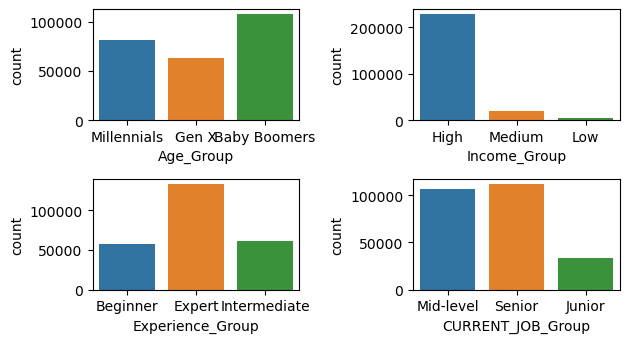

In [13]:
# distribusi data numerikal setelah grouping
features = numerikal_group
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data_group[features[i]])
  plt.tight_layout()

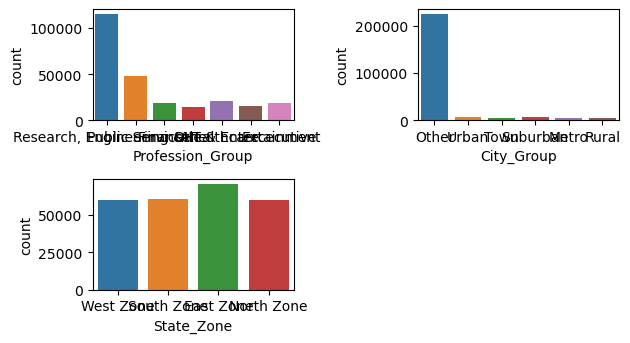

In [14]:
# distribusi data kategorikal setelah grouping
features = kategorikal_group
for i in range(0, len(features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=data_group[features[i]])
    plt.tight_layout()

Setelah dilakukan grouping pada kolom-kolom yang memiliki kategori yang luas, countplot lebih mudah dibaca dan selanjutnya akan diproses lebih lanjut pada Multivariate Analysis

**Data Pre Processing yang Dapat Dilakukan**:

* Transformasi Data untuk data distribusi yang miring atau non-normal, pertimbangkan untuk menerapkan transformasi pada data numerik.
* Feature Engineering untuk kolom yang terlalu banyak kategori, dapat dikelompokan menjadi beberapa kategori yang lebih umum atau menggunakan metode seperti one-hot encoding atau label encoding.
* Handling Imbalance:untuk data kategorik yang tidak seimbang sehingga akan diputuskan apakah oversampling (menambahkan data minoritas) atau undersampling (mengurangi data mayoritas) diperlukan untuk menyeimbangkan dataset atau tidak
* Feature Selection: Berdasarkan hasil observasi distribusi,dipilih fitur-fitur yang memiliki dampak signifikan dalam analisis.

## 3. Multivariate Analysis

In [15]:
data_group.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_11344\2193046790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_group.corr()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_11344\2366940798.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_group.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

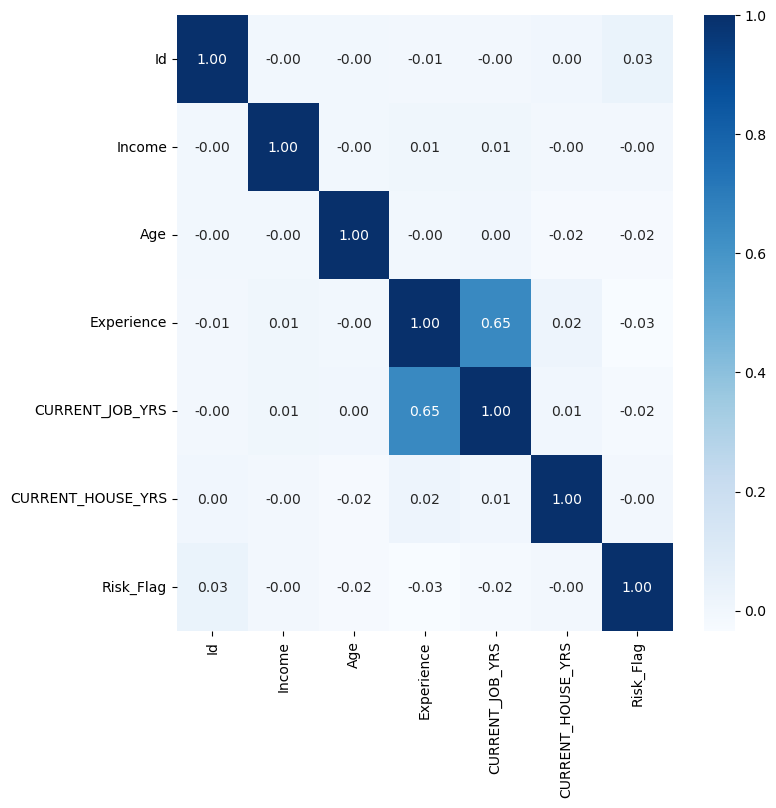

In [16]:
# correlation heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(data_group.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

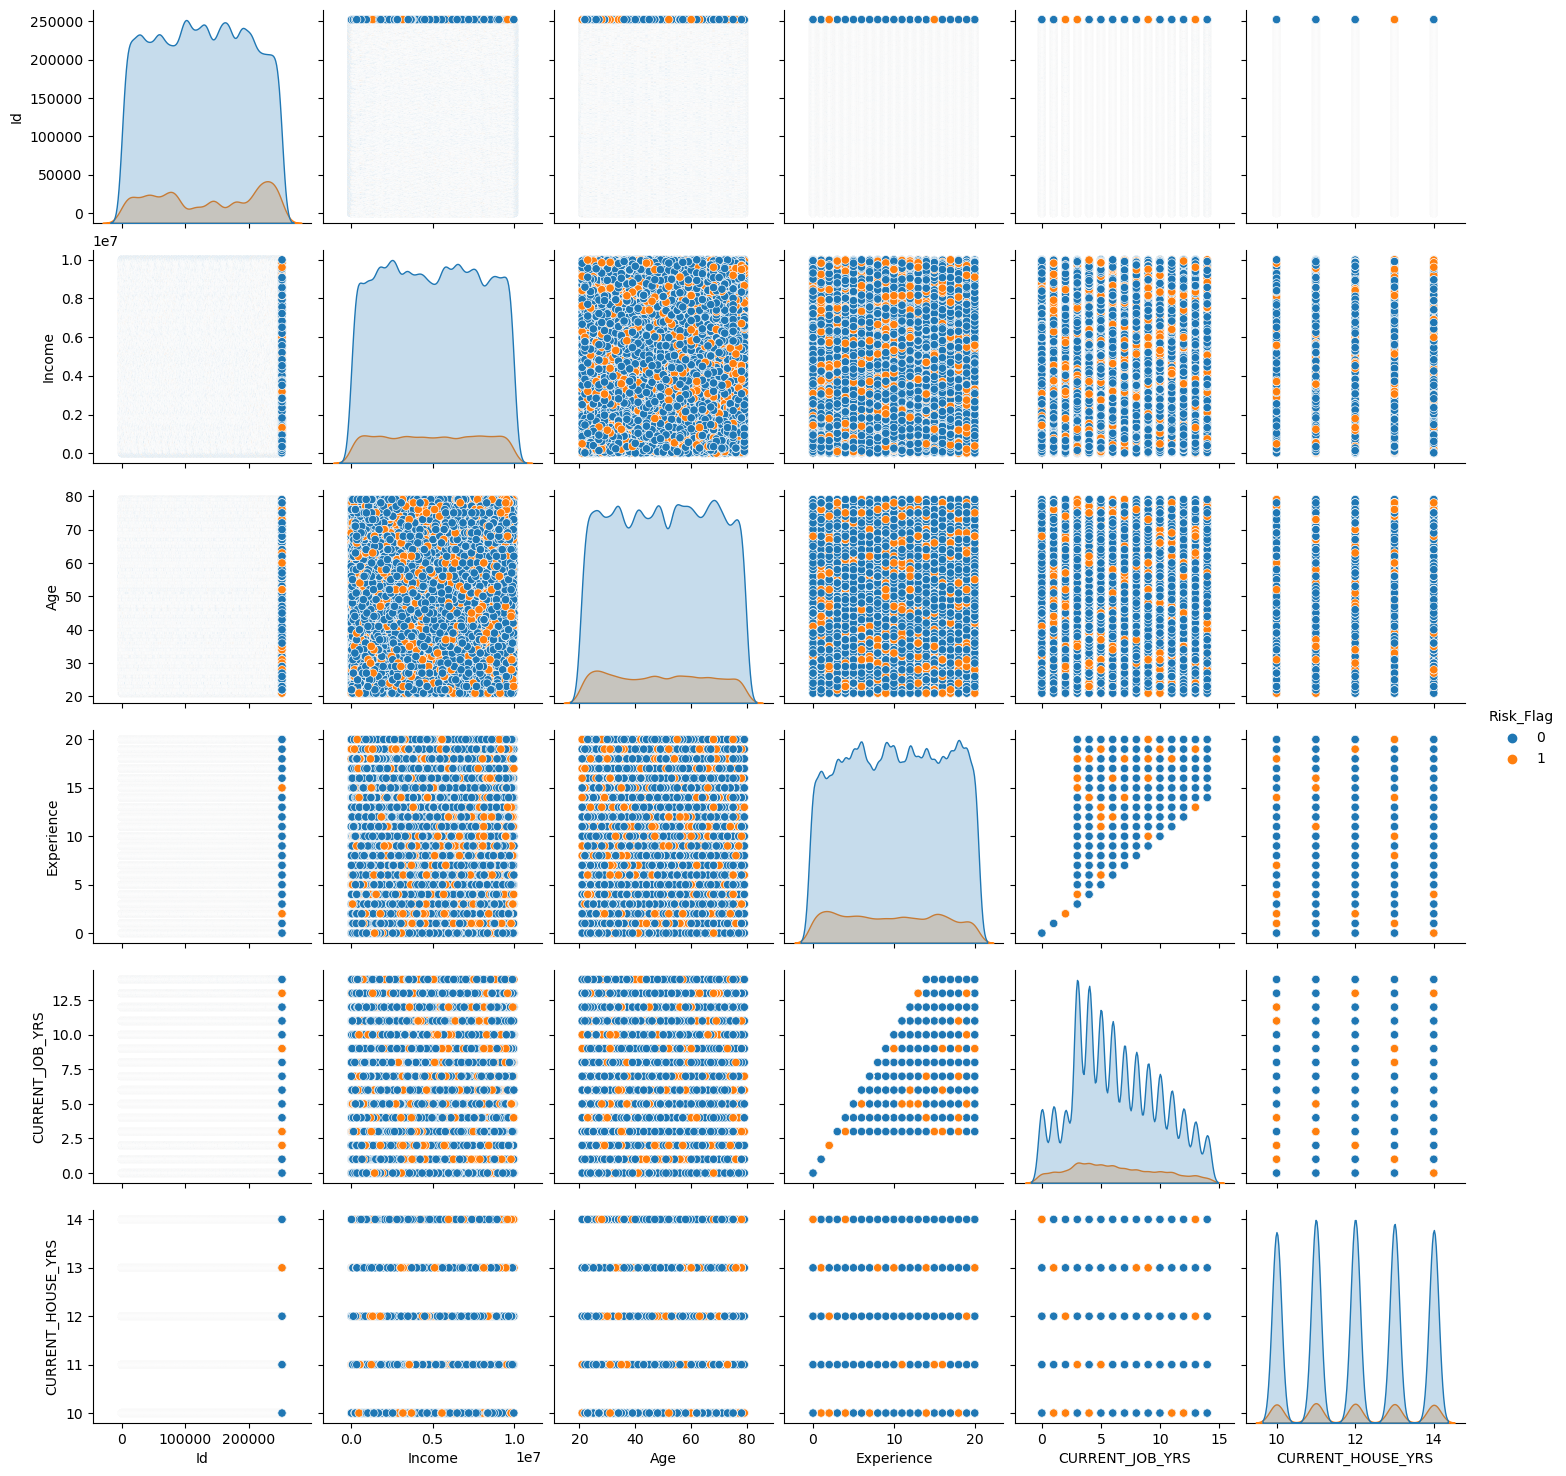

In [17]:
# pair plot dengan risk_flag sebagai hue

plt.figure(figsize=(15, 15))
sns.pairplot(data_group, diag_kind='kde', hue='Risk_Flag')

In [18]:
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone


<Figure size 1000x800 with 0 Axes>

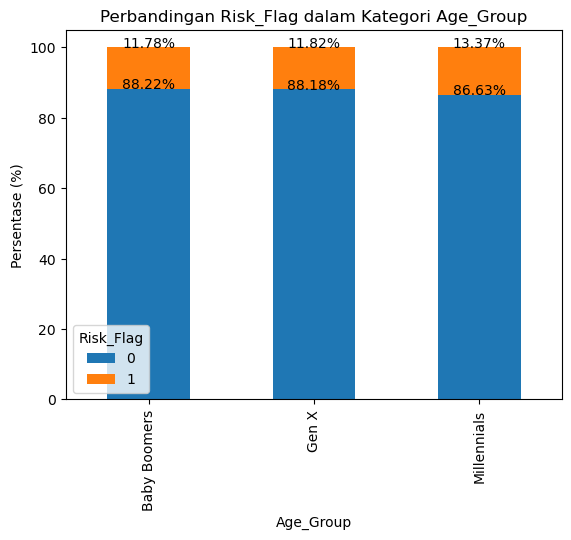

<Figure size 1000x800 with 0 Axes>

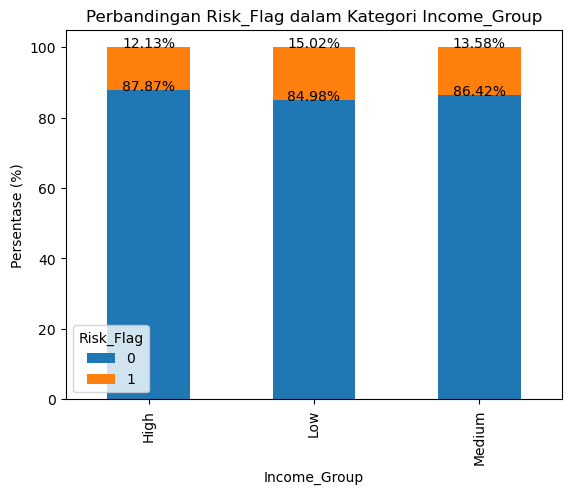

<Figure size 1000x800 with 0 Axes>

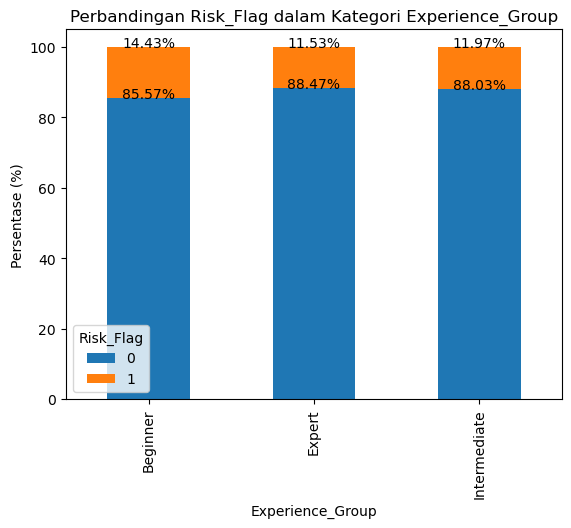

<Figure size 1000x800 with 0 Axes>

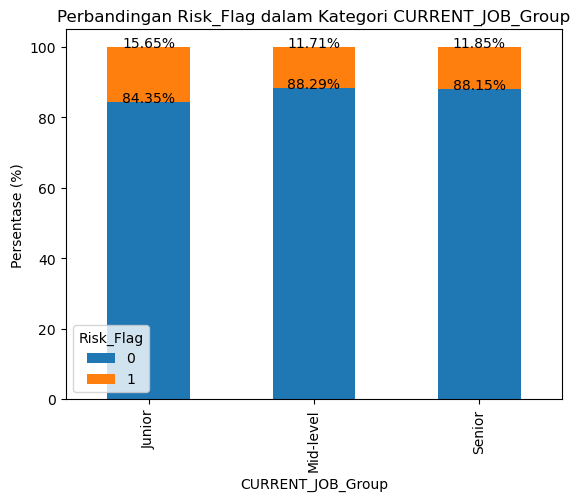

<Figure size 1000x800 with 0 Axes>

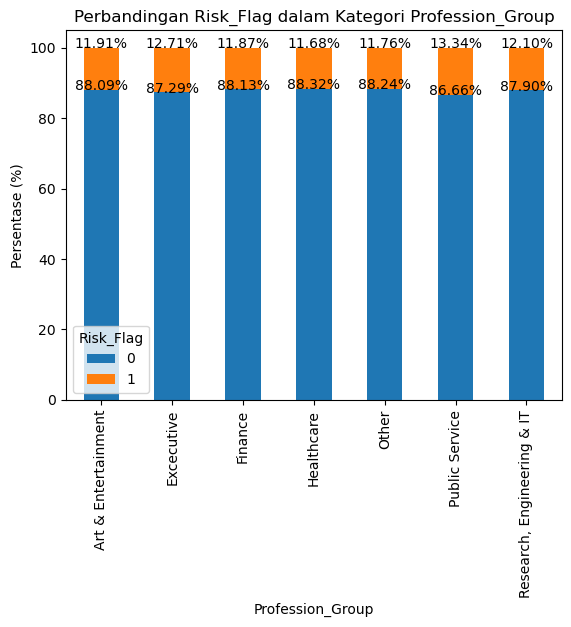

<Figure size 1000x800 with 0 Axes>

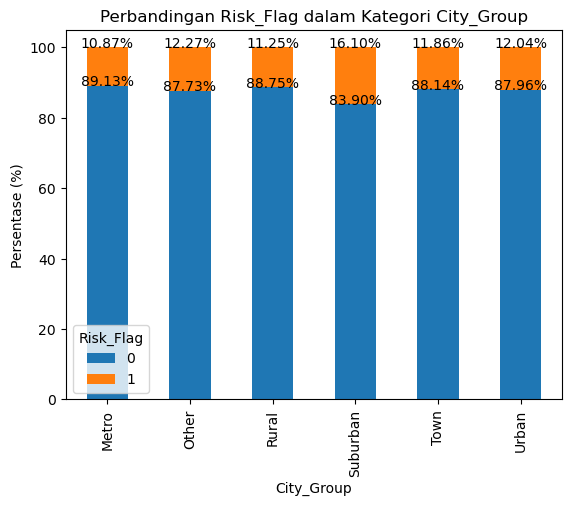

<Figure size 1000x800 with 0 Axes>

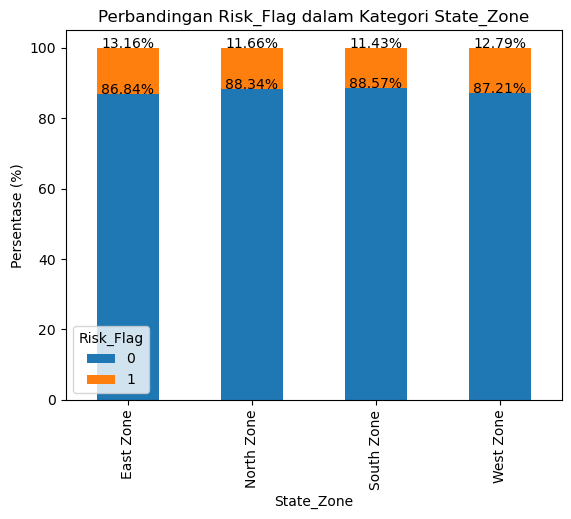

<Figure size 1000x800 with 0 Axes>

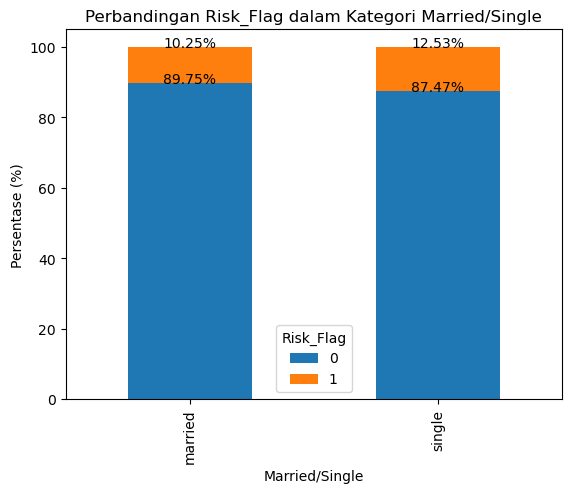

<Figure size 1000x800 with 0 Axes>

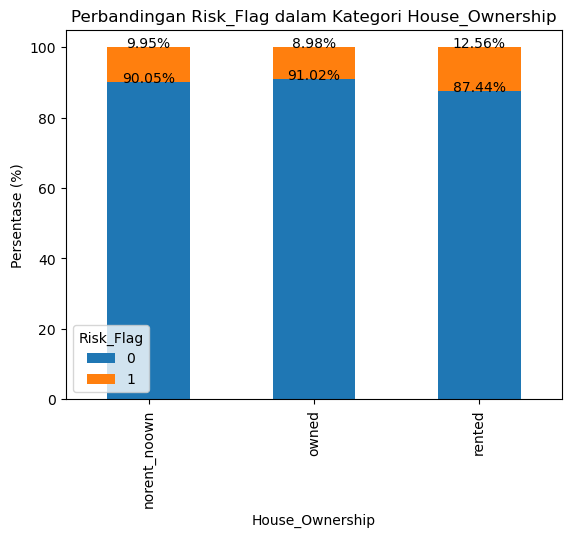

<Figure size 1000x800 with 0 Axes>

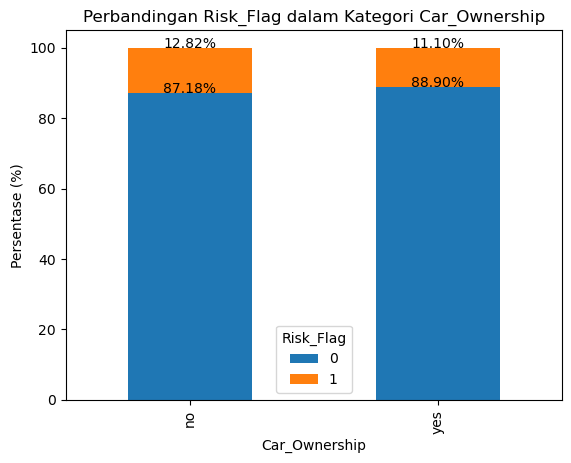

<Figure size 1000x800 with 0 Axes>

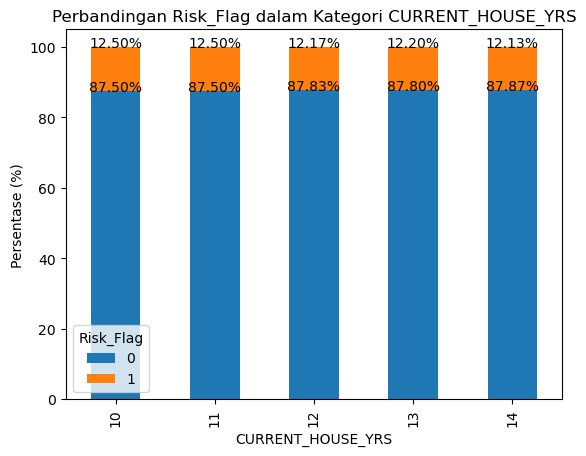

In [19]:
# visualisasi hubungan antar kolom dengan risk_flag

# kolom data setelah grouping
kolom_kategorikal = ['Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group',
            'Profession_Group', 'City_Group', 'State_Zone', 'Married/Single',
            'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS']

for kategori in kolom_kategorikal:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase Risk_Flag (0 dan 1) dalam setiap kategori
    grouped_data = data_group.groupby(kategori)['Risk_Flag'].value_counts(
        normalize=True).unstack() * 100

    ax = grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'Perbandingan Risk_Flag dalam Kategori {kategori}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

    plt.show()

## 4. Business Insight

Dalam penentuan pemberian kredit kepada nasabah, dapat menerapkan prinsip analisa 5C yang meliputi Character (Watak), Capacity (Kemampuan), Capital (Modal), Condition (Kondisi), dan Collateral (Jaminan).
  - **Capacity**

    Nasabah dengan penghasilan income Low cenderung lebih tinggi dalam tingkat risiko kredit dengan persentase 15.02% dari total nasabah dengan kategori penghasilan yang sama
    
  - **Capital**

    Dari data didapatkan bahwa nasabah dengan modal atau kepemilikan harta tidak memiliki mobil dan menyewa rumah memiliki angka risiko yang lebih tinggi dengan persentase masing masing yaitu 11.10% dan 12.56% di setiap kategori kelasnya. Dari data data dapat dirumuskan hipotesis dengan pemberian kredit lebih baik diberikan kepada nasabah yang memiliki harta tetap dibandingkan dengan kepemilikan sementara.
  - **Condition**

    Nasabah dengan status single dan rentang usia Millennials cenderung memiliki tingkat resiko cukup tinggi dalam gagal bayar pinjaman dengan persentase daripada nasabah yang sudah menikah dan/atau nasabah berusia selain millennials dengan masing-masing persentase 12.53% dan 13.37%  di setiap kategori kelasnya.
  - **Collateral**

    Nasabah yang menyewa rumah cenderung lebih tinggi untuk tingkat risiko gagal bayar pinjaman dengan persentase 12.56% dari pada nasabah yang memiliki rumah pribadi 9% dan juga nasabah yang belum mempunyai rumah pribadi 9.95%. Sehingga dalam hal ini, lembaga pemberi pinjaman tidak disarankan untuk memberikan pinjaman terutama dalam jumlah banyak kepada nasabah dengan kepemilikan rumah menyewa dan tanpa kepemilikan rumah.
    
Dalam kemampuan nasabah, nasabah dengan income low lebih berpotensi gagal bayar pinjaman dengan persentase 15%, dibanding dengan nasabah yang memiliki income medium 14%, dan income high 12%. Selain itu, pada feature Age tidak ada perbedaan yang signifikan antara 3 generasi yaitu Gen X, Millennials, dan Baby Boomers dengan risiko gagal bayar pinjaman. Dan untuk feature Experience juga tidak ada perbedaan yang signifikan, namun semakin lama pengalaman nasabah maka semakin kecil nasabah berpotensi gagal bayar pinjaman. Begitu juga dengan feature Current_Job_Yrs, tidak ada perbedaan yang signifikan, namun nasabah dengan current job rendah atau junior maka potensi gagal bayar pinjaman lebih tinggi daripada mid-level dan senior.

# Data Pre-Processing

## Data Cleansing

### a. Handle Duplicated Data

In [20]:
# Menghapus kolom 'Id'
data_cek = data_group.drop('Id', axis=1)

# Jumlah data sebelum handle duplicate (tanpa kolom 'Id')
jumlah_data_sebelum = data_cek.shape[0]
print("Jumlah data sebelum handle duplicate (tanpa kolom 'Id'):", jumlah_data_sebelum)

Jumlah data sebelum handle duplicate (tanpa kolom 'Id'): 252000


In [21]:
# Mengidentifikasi data duplikat
duplicates = data_cek[data_cek.duplicated(keep=False)]

In [22]:
# Handle data duplikat
data_group = data_group.drop_duplicates()

# Menampilkan jumlah data setelah penanganan duplicate
jumlah_data_sesudah = data_group.shape[0]
print("Jumlah data setelah handle duplicate:", jumlah_data_sesudah)

Jumlah data setelah handle duplicate: 252000


### b. Handle Outliers

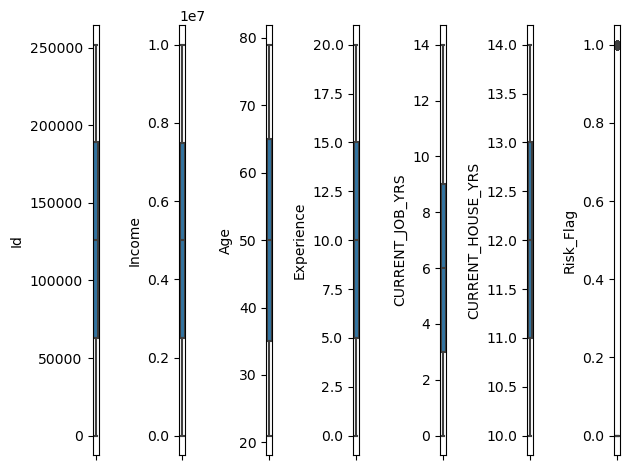

In [23]:
features = numerikal
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data_group[features[i]])
    plt.tight_layout()

1. Handle Outliers pada kolom Income & Age

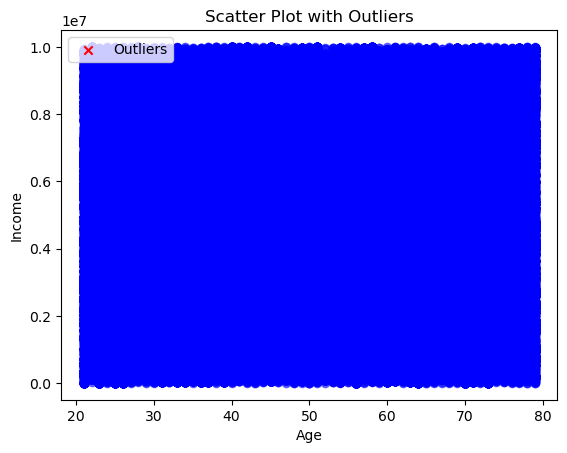

In [24]:
plt.scatter(data_group['Age'], data_group['Income'], color='blue', alpha=0.5)

# Identifikasi outliers
Q1 = data_group['Income'].quantile(0.25)
Q3 = data_group['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = data_group[(data_group['Income'] < lower_fence) | (data_group['Income'] > upper_fence)]

# Tandai outliers dengan warna merah
plt.scatter(outliers['Age'], outliers['Income'], color='red', marker='x', label='Outliers')

#Visualisasi
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.show()

Tidak Ada Outliers pada Income dan Age, karena berdasarkan visual scatter plot dapat ditemukan bahwa sebaran data tidak memiliki nilai signifikan dan tidak berjauhan dari pola nya. Selain itu, outliers memiliki simbol "X" dimana pada visualisasi tidak ditemukan simbol "X" sehingga dapat disimpulkan tidak ada outliers pada kolom Income dan Age.

2. Handle Outliers pada Kolom Experience

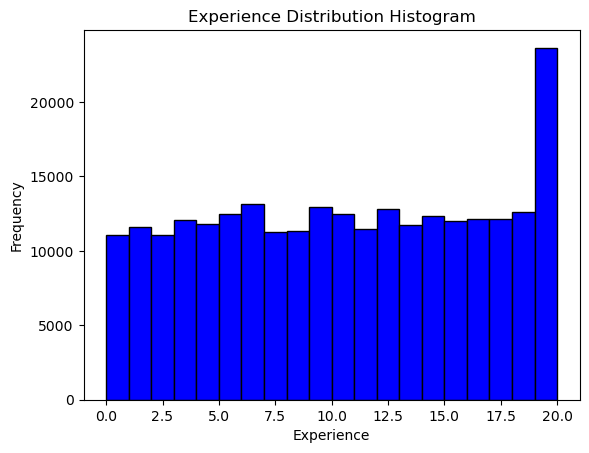

In [25]:
# Visualisasi Distribusi Data Experience
plt.hist(data_group['Experience'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Experience Distribution Histogram')
plt.show()

In [26]:
# Hitung IQR
Q1 = data_group['Experience'].quantile(0.25)
Q3 = data_group['Experience'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers_income = data_group[(data_group['Experience'] < lower_fence) | (data_group['Experience'] > upper_fence)]

print("Outliers in 'Experience' column:")
print(outliers['Experience'])

Outliers in 'Experience' column:
Series([], Name: Experience, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

3. Handle outliers pada Kolom CURRENT_JOB_YRS

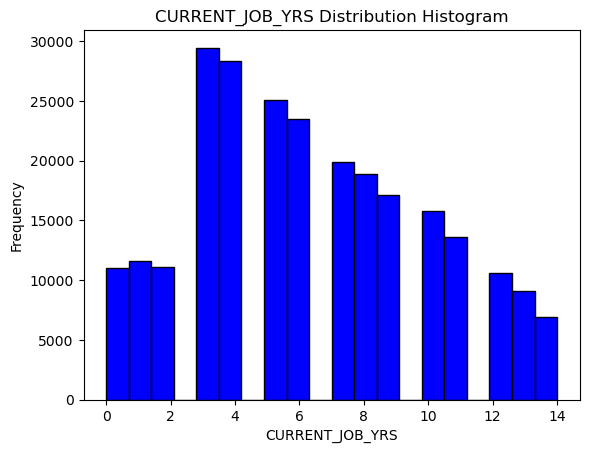

In [27]:
# Visualisasi Distribusi data
plt.hist(data_group['CURRENT_JOB_YRS'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.title('CURRENT_JOB_YRS Distribution Histogram')
plt.show()

In [28]:
# Hitung IQR untuk kolom 'CURRENT_JOB_YRS'
Q1 = data_group['CURRENT_JOB_YRS'].quantile(0.25)
Q3 = data_group['CURRENT_JOB_YRS'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = data_group[(data_group['CURRENT_JOB_YRS'] < lower_fence) | (data_group['CURRENT_JOB_YRS'] > upper_fence)]

print("Outliers in 'CURRENT_JOB_YRS' column:")
print(outliers['CURRENT_JOB_YRS'])

Outliers in 'CURRENT_JOB_YRS' column:
Series([], Name: CURRENT_JOB_YRS, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

4. Handle outliers pada kolom CURRRENT_HOUSE_YRS

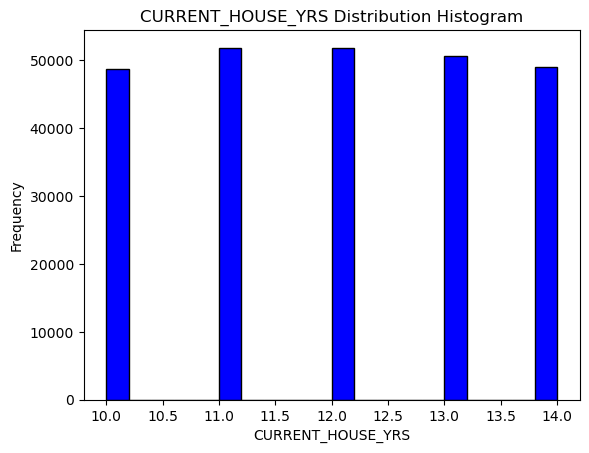

In [29]:
# Visualisasi Distribusi data
plt.hist(data_group['CURRENT_HOUSE_YRS'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.title('CURRENT_HOUSE_YRS Distribution Histogram')
plt.show()

In [30]:
# Hitung IQR untuk kolom 'CURRENT_JOB_YRS'
Q1 = data_group['CURRENT_HOUSE_YRS'].quantile(0.25)
Q3 = data_group['CURRENT_HOUSE_YRS'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = data_group[(data_group['CURRENT_HOUSE_YRS'] < lower_fence) | (data_group['CURRENT_HOUSE_YRS'] > upper_fence)]

print("Outliers in 'CURRENT_HOUSE_YRS' column:")
print(outliers['CURRENT_HOUSE_YRS'])

Outliers in 'CURRENT_HOUSE_YRS' column:
Series([], Name: CURRENT_HOUSE_YRS, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

**Kesimpulan Handle Outliers**: Tidak ditemukan outliers pada pada kolom numerik baik Income, Age, Experience, Current house years, dan current job years.

### d. Feature Transformation

**1. Log Transformation**

<Axes: xlabel='Income', ylabel='Density'>

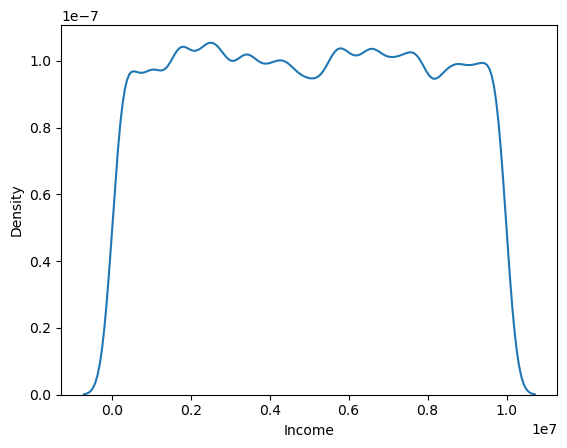

In [31]:
# distribusi gaji (nilai asli)
sns.kdeplot(data_group['Income'])

Feature Income memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='Age', ylabel='Density'>

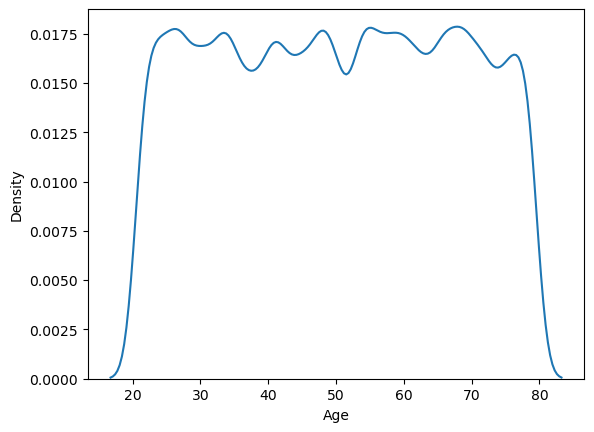

In [32]:
sns.kdeplot(data_group['Age'])

Feature Age memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='Experience', ylabel='Density'>

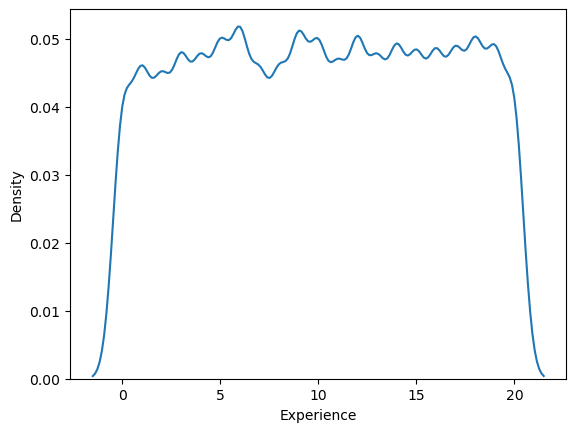

In [33]:
sns.kdeplot(data_group['Experience'])

Feature Eksperience memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Density'>

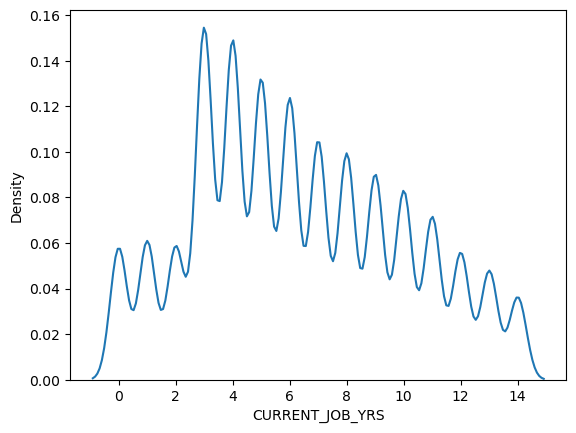

In [34]:
sns.kdeplot(data_group['CURRENT_JOB_YRS'])

In [35]:
# Cek Skewness untuk melihat ke arah mana distribusi nya
from scipy.stats import skew
skewness = skew(data_group['CURRENT_JOB_YRS'])
print(f"Skewness: {skewness}")

Skewness: 0.27314433155243134


Feature Current_Job_Yrs memiliki distribusi right-skewed

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='Density'>

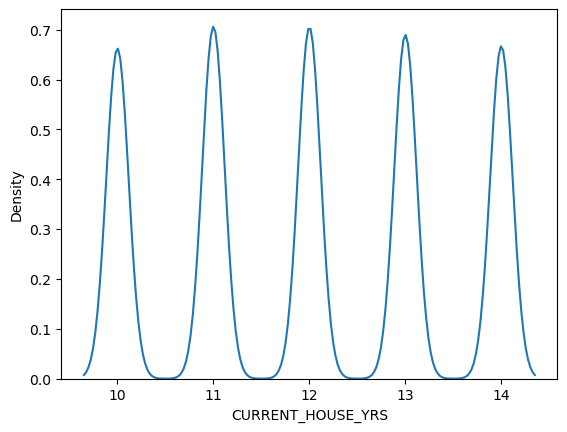

In [36]:
sns.kdeplot(data_group['CURRENT_HOUSE_YRS'])

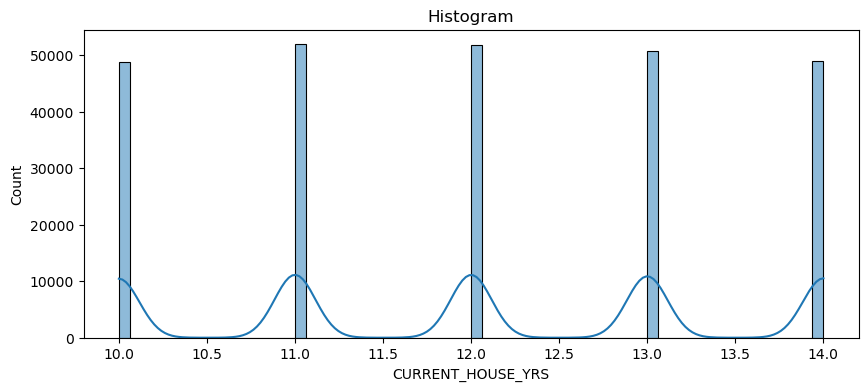

In [37]:
var_1 = 'CURRENT_HOUSE_YRS'

# Membuat histogram
plt.figure(figsize=(10, 4))
sns.histplot(data_group[var_1], kde=True)
plt.title('Histogram')
plt.show()

In [38]:
from scipy.stats import skew
skewness = skew(data_group['CURRENT_HOUSE_YRS'])
print(f"Skewness: {skewness}")

Skewness: 0.0067860588471736856


Feature CURRENT_HOUSE_YRS memiliki distribusi multimodal

**2. Normalization/Standarization**

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Inisialisasi scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalisasi CURRENT_HOUSE_YRS & CURRENT_JOB_YRS (karena distribusi yang tidak normal atau bimodal)
data_group['CURRENT_HOUSE_YRS_norm'] = min_max_scaler.fit_transform(data_group[['CURRENT_HOUSE_YRS']])
data_group['CURRENT_JOB_YRS_norm'] = min_max_scaler.fit_transform(data_group[['CURRENT_JOB_YRS']])

# Standarisasi Income, Age & Experience (karena distribusi datanya sudah mendekati normal)
data_group['Income_std'] = standard_scaler.fit_transform(data_group[['Income']])
data_group['Age_std'] = standard_scaler.fit_transform(data_group[['Age']])
data_group['Experience_std'] = standard_scaler.fit_transform(data_group[['Experience']])

1. CURRENT_JOB_YRS dan CURRENT_HOUSE_YRS dilakukan normalisasi untuk mengatasi perbedaan skala data, karena normalisasi akan membawa data ke rentang yang seragam antara 0 dan 1. Hal ini akan membantu algoritma machine learning yang sensitif terhadap perbedaan skala dalam data, seperti regresi logistik dan k-nearest neighbors, untuk menghasilkan hasil yang lebih baik. Selain itu, normalisasi juga cocok untuk data dengan distribusi yang tidak normal atau bimodal.
2. Age, Income, dan Experience dilakukan standarisasi karena memiliki distribusi mendekati normal. Standarisasi mengubah data menjadi distribusi normal standar dengan rata-rata 0 dan deviasi standar 1, sehingga memenuhi asumsi algoritma machine learning yang mengasumsikan distribusi normal. Dengan standarisasi, variabel-variabel ini akan memiliki dampak yang seimbang pada pemodelan.


In [40]:
data_group.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05,2.520000e+05,2.520000e+05
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000,0.499448,0.452420,4.436663e-17,-1.699663e-16,1.169576e-16
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438,0.349759,0.260504,1.000002e+00,1.000002e+00,1.000002e+00
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,-1.732550e+00,-1.696811e+00,-1.680018e+00
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,0.250000,0.214286,-8.665174e-01,-8.763612e-01,-8.470421e-01
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,0.500000,0.428571,1.243035e-03,2.691576e-03,-1.406671e-02
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,0.750000,0.642857,8.617520e-01,8.817444e-01,8.189087e-01
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.738114e+00,1.702194e+00,1.651884e+00


In [41]:
data_group[['Income', 'Income_std',
    'Age', 'Age_std',
    'Experience', 'Experience_std',
    'CURRENT_JOB_YRS', 'CURRENT_JOB_YRS_norm',
    'CURRENT_HOUSE_YRS', 'CURRENT_HOUSE_YRS_norm']].describe()

,Income,Income_std,Age,Age_std,Experience,Experience_std,CURRENT_JOB_YRS,CURRENT_JOB_YRS_norm,CURRENT_HOUSE_YRS,CURRENT_HOUSE_YRS_norm
count,2.520000e+05,2.520000e+05,252000.000000,2.520000e+05,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,4.436663e-17,49.954071,-1.699663e-16,10.084437,1.169576e-16,6.333877,0.452420,11.997794,0.499448
std,2.878311e+06,1.000002e+00,17.063855,1.000002e+00,6.002590,1.000002e+00,3.647053,0.260504,1.399037,0.349759
min,1.031000e+04,-1.732550e+00,21.000000,-1.696811e+00,0.000000,-1.680018e+00,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,-8.665174e-01,35.000000,-8.763612e-01,5.000000,-8.470421e-01,3.000000,0.214286,11.000000,0.250000
50%,5.000694e+06,1.243035e-03,50.000000,2.691576e-03,10.000000,-1.406671e-02,6.000000,0.428571,12.000000,0.500000
75%,7.477502e+06,8.617520e-01,65.000000,8.817444e-01,15.000000,8.189087e-01,9.000000,0.642857,13.000000,0.750000
max,9.999938e+06,1.738114e+00,79.000000,1.702194e+00,20.000000,1.651884e+00,14.000000,1.000000,14.000000,1.000000


## Feature Extraction

Penggabungan Kolom City dan State

In [42]:
data_group['City_State'] = data_group['City_Group'] + '_' + data_group['State_Zone']

Penggabungan Kepemilikan Mobil dan Rumah

In [43]:
# Membuat mapping dari kombinasi kelas House_Ownership dan Car_Ownership ke nilai baru
mapping = {
    ('owned', 'yes'): 1,
    ('owned', 'no'): 2,
    ('rented', 'yes'): 3,
    ('rented', 'no'): 4,
    ('norent_noown', 'yes'): 5,
    ('norent_noown', 'no'): 6
}

# Menggunakan map untuk menggabungkan kelas
data_group['Asset'] = data_group[['House_Ownership', 'Car_Ownership']].apply(lambda x: mapping.get(tuple(x)), axis=1)
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std,City_State,Asset
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,Beginner,Mid-level,West Zone,0.75,0.214286,-1.283145,-1.579604,-1.180232,Other_West Zone,4
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,Expert,Senior,West Zone,0.75,0.642857,0.895457,-0.583344,-0.014067,Other_West Zone,4
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,Beginner,Mid-level,South Zone,0.00,0.285714,-0.349269,0.940348,-1.013637,Other_South Zone,4
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,Beginner,Junior,East Zone,0.50,0.142857,0.437526,-0.524740,-1.346827,Other_East Zone,3
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,Expert,Mid-level,South Zone,1.00,0.214286,0.268128,-0.173119,0.152528,Other_South Zone,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,...,Expert,Mid-level,East Zone,0.25,0.428571,1.097092,-0.407533,0.485719,Metro_East Zone,4
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,...,Expert,Mid-level,West Zone,0.25,0.428571,-0.748199,-1.403793,-0.014067,Other_West Zone,4
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,...,Intermediate,Senior,West Zone,0.50,0.500000,-0.164913,-0.231723,-0.513852,Other_West Zone,4
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,...,Beginner,Junior,South Zone,0.00,0.000000,0.524618,-0.290326,-1.680018,Other_South Zone,4


Penggabungan Kolom Age dan Married

In [44]:
data_group['Age_Married'] = data_group['Age_Group'] + ' ' + data_group['Married/Single']

# Map value
data_group['Age_Married'] = data_group['Age_Married'].replace({
    'Millennials married': 1,
    'Millennials single': 2,
    'Gen X married': 3,
    'Gen X single': 4,
    'Baby Boomers married': 5,
    'Baby Boomers single': 6
})

data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std,City_State,Asset,Age_Married
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,Mid-level,West Zone,0.75,0.214286,-1.283145,-1.579604,-1.180232,Other_West Zone,4,2
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,Senior,West Zone,0.75,0.642857,0.895457,-0.583344,-0.014067,Other_West Zone,4,4
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,Mid-level,South Zone,0.00,0.285714,-0.349269,0.940348,-1.013637,Other_South Zone,4,5
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,Junior,East Zone,0.50,0.142857,0.437526,-0.524740,-1.346827,Other_East Zone,3,4
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,Mid-level,South Zone,1.00,0.214286,0.268128,-0.173119,0.152528,Other_South Zone,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,...,Mid-level,East Zone,0.25,0.428571,1.097092,-0.407533,0.485719,Metro_East Zone,4,4
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,...,Mid-level,West Zone,0.25,0.428571,-0.748199,-1.403793,-0.014067,Other_West Zone,4,2
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,...,Senior,West Zone,0.50,0.500000,-0.164913,-0.231723,-0.513852,Other_West Zone,4,4
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,...,Junior,South Zone,0.00,0.000000,0.524618,-0.290326,-1.680018,Other_South Zone,4,4


## Transformation

In [45]:
columns_to_drop = ['Id', 'Income', 'Age', 'Experience', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'City_Group']

data_group = data_group.drop(columns=columns_to_drop)
data_group

,Married/Single,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std,City_State,Asset,Age_Married
0,single,13,0,"Research, Engineering & IT",Millennials,High,Beginner,Mid-level,West Zone,0.75,0.214286,-1.283145,-1.579604,-1.180232,Other_West Zone,4,2
1,single,13,0,"Research, Engineering & IT",Gen X,High,Expert,Senior,West Zone,0.75,0.642857,0.895457,-0.583344,-0.014067,Other_West Zone,4,4
2,married,10,0,"Research, Engineering & IT",Baby Boomers,High,Beginner,Mid-level,South Zone,0.00,0.285714,-0.349269,0.940348,-1.013637,Other_South Zone,4,5
3,single,12,1,"Research, Engineering & IT",Gen X,High,Beginner,Junior,East Zone,0.50,0.142857,0.437526,-0.524740,-1.346827,Other_East Zone,3,4
4,single,14,1,Public Service,Gen X,High,Expert,Mid-level,South Zone,1.00,0.214286,0.268128,-0.173119,0.152528,Other_South Zone,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,single,11,0,Healthcare,Gen X,High,Expert,Mid-level,East Zone,0.25,0.428571,1.097092,-0.407533,0.485719,Metro_East Zone,4,4
251996,single,11,0,Public Service,Millennials,High,Expert,Mid-level,West Zone,0.25,0.428571,-0.748199,-1.403793,-0.014067,Other_West Zone,4,2
251997,single,12,0,"Research, Engineering & IT",Gen X,High,Intermediate,Senior,West Zone,0.50,0.500000,-0.164913,-0.231723,-0.513852,Other_West Zone,4,4
251998,single,10,0,"Research, Engineering & IT",Gen X,High,Beginner,Junior,South Zone,0.00,0.000000,0.524618,-0.290326,-1.680018,Other_South Zone,4,4


In [46]:
data_group.keys()

Index(['Married/Single', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Profession_Group',
       'Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group',
       'State_Zone', 'CURRENT_HOUSE_YRS_norm', 'CURRENT_JOB_YRS_norm',
       'Income_std', 'Age_std', 'Experience_std', 'City_State', 'Asset',
       'Age_Married'],
      dtype='object')

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# List kolom numerik
numeric_cols = ['CURRENT_HOUSE_YRS']

# List kolom kategori
categorical_cols = ['Married/Single', 'Profession_Group', 'Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group', 'State_Zone', 'City_State']

# Transformer untuk data numerik (MinMaxScaler)
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Normalisasi data numerik dengan MinMaxScaler
])

# Transformer untuk data kategori (OrdinalEncoder)
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())  # Encoding data kategori dengan OrdinalEncoder
])

# Menggabungkan transformer untuk semua kolom
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Melakukan transformasi pada data_group
transformed_data = preprocessor.fit_transform(data_group)

# Membuat DataFrame baru dari hasil transformasi
transformed_df = pd.DataFrame(transformed_data, columns=numeric_cols + categorical_cols)

# Menambahkan kolom 'Risk_Flag' dari data_group ke transformed_df
transformed_df['Risk_Flag'] = data_group['Risk_Flag']

# Mengganti data_group dengan hasil transformasi
data_group = transformed_df

In [48]:
data_group

,CURRENT_HOUSE_YRS,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,0.75,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,0.75,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.00,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,0.50,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.00,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...
251995,0.25,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0
251996,0.25,1.0,5.0,2.0,0.0,1.0,1.0,3.0,7.0,0
251997,0.50,1.0,6.0,1.0,0.0,2.0,2.0,3.0,7.0,0
251998,0.00,1.0,6.0,1.0,0.0,0.0,0.0,2.0,6.0,0


## Imbalance Handling

### Data Group

In [49]:
columns_to_drop = ['Id', 'Income', 'Age', 'Experience', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS']
for column in columns_to_drop:
    if column in data_group.columns:
        data_group = data_group.drop(column, axis=1)
data_group

,CURRENT_HOUSE_YRS,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,0.75,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,0.75,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.00,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,0.50,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.00,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...
251995,0.25,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0
251996,0.25,1.0,5.0,2.0,0.0,1.0,1.0,3.0,7.0,0
251997,0.50,1.0,6.0,1.0,0.0,2.0,2.0,3.0,7.0,0
251998,0.00,1.0,6.0,1.0,0.0,0.0,0.0,2.0,6.0,0


In [50]:
nan_data = data_group[data_group.isna().any(axis=1)]
nan_data

,CURRENT_HOUSE_YRS,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag


In [51]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y)
X = data_group.drop('Risk_Flag', axis=1)
X = X.select_dtypes(exclude=['object'])

y = data_group['Risk_Flag']

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menghitung distribusi kelas setelah oversampling
value_counts_resampled = y_resampled.value_counts()

# Menampilkan distribusi kelas setelah oversampling
print("Distribusi Kelas Setelah Oversampling:")
print(value_counts_resampled)

# Membuat DataFrame dari hasil SMOTE
data_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
data_resampled['Risk_Flag'] = y_resampled

# Menggabungkan hasil SMOTE ke dalam 'data_group'
data_group = data_resampled

Distribusi Kelas Setelah Oversampling:
0    221004
1    221004
Name: Risk_Flag, dtype: int64


In [52]:
# Menghitung total data saat Risk_Flag = 1
total_data_flag_1 = len(data_group[data_group['Risk_Flag'] == 1])

# Menghitung total data saat Risk_Flag = 0
total_data_flag_0 = len(data_group[data_group['Risk_Flag'] == 0])

print("Total Data              : ", len(data_group))
print("Total Data Risk_Flag = 1: ", total_data_flag_1)
print("Total Data Risk_Flag = 0: ", total_data_flag_0)

Total Data              :  442008
Total Data Risk_Flag = 1:  221004
Total Data Risk_Flag = 0:  221004


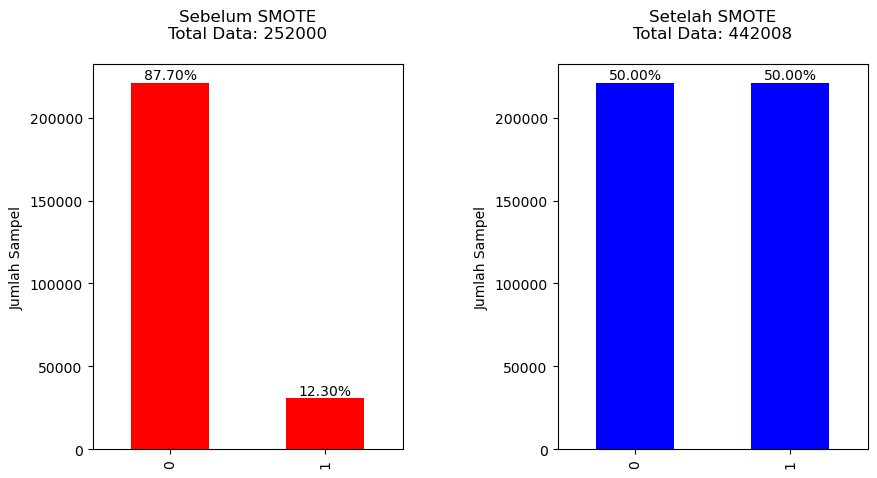

In [53]:
import matplotlib.pyplot as plt

# Data sebelum SMOTE
class_distribution_before = y.value_counts()
total_before = len(y)

# Data setelah SMOTE
class_distribution_after = y_resampled.value_counts()
total_after = len(y_resampled)

# Plotting distribusi kelas sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5)

class_distribution_before.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title(f'Sebelum SMOTE\nTotal Data: {total_before}\n')
axes[0].set_ylabel('Jumlah Sampel')

class_distribution_after.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title(f'Setelah SMOTE\nTotal Data: {total_after}\n')
axes[1].set_ylabel('Jumlah Sampel')

# Anotasi persentase pada bar plot
for i, ax in enumerate(axes):
    total = total_before if i == 0 else total_after
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

In [54]:
data_group

,CURRENT_HOUSE_YRS,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,0.75,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,0.75,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.00,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,0.50,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.00,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...
442003,0.75,0.0,6.0,1.0,0.0,1.0,1.0,3.0,18.0,1
442004,0.75,1.0,5.0,1.0,0.0,0.0,1.0,3.0,7.0,1
442005,0.75,1.0,5.0,1.0,0.0,0.0,1.0,3.0,7.0,1
442006,0.75,1.0,6.0,0.0,0.0,2.0,1.0,2.0,6.0,1


### Data Mentah

In [55]:
data_mentah

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [56]:
nan_data = data_mentah[data_mentah.isna().any(axis=1)]
nan_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


In [57]:
data_mentah = data_mentah.drop('Id', axis=1)

In [58]:
# Menghitung total data saat Risk_Flag = 1 pada data mentah
total_data_flag_1_raw = len(data_mentah[data_mentah['Risk_Flag'] == 1])

# Menghitung total data saat Risk_Flag = 0 pada data mentah
total_data_flag_0_raw = len(data_mentah[data_mentah['Risk_Flag'] == 0])

print("Total Data              : ", len(data_mentah))
print("Total Data Risk_Flag = 1: ", total_data_flag_1_raw)
print("Total Data Risk_Flag = 0: ", total_data_flag_0_raw)

Total Data              :  252000
Total Data Risk_Flag = 1:  30996
Total Data Risk_Flag = 0:  221004


In [59]:
data_mentah

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### Data Encoding for Data Mentah

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

# List kolom-kolom yang akan di-normalisasi dan di-ordinal encode
numeric_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# Membuat transformer untuk data numerik (normalisasi)
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Menggunakan MinMaxScaler untuk normalisasi data numerik
])

# Membuat transformer untuk data kategori (ordinal encoding)
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())  # Menggunakan OrdinalEncoder untuk encoding data kategori
])

# Menggabungkan transformer untuk semua kolom
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Melakukan normalisasi dan encoding
data_transformed = preprocessor.fit_transform(data_mentah)

In [61]:
import pandas as pd

# Nama kolom baru setelah normalisasi dan encoding
transformed_columns = numeric_cols + categorical_cols

# Membuat DataFrame baru dengan data yang sudah di-transform
data_tabular = pd.DataFrame(data_transformed, columns=transformed_columns)

# Menambahkan kolom 'Risk_Flag' dari data_mentah ke data_tabular
data_tabular['Risk_Flag'] = data_mentah['Risk_Flag']
data_mentah = data_tabular

# Menampilkan beberapa baris pertama dari data_tabular
data_mentah

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.75,1.0,2.0,0.0,33.0,251.0,13.0,0
1,0.757206,0.327586,0.50,0.642857,0.75,1.0,2.0,0.0,43.0,227.0,14.0,0
2,0.398564,0.775862,0.20,0.285714,0.00,0.0,2.0,0.0,47.0,8.0,12.0,0
3,0.625263,0.344828,0.10,0.142857,0.50,1.0,2.0,1.0,43.0,54.0,17.0,1
4,0.576454,0.448276,0.55,0.214286,1.00,1.0,2.0,0.0,11.0,296.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,0.428571,0.25,1.0,2.0,0.0,45.0,162.0,28.0,0
251996,0.283620,0.086207,0.50,0.428571,0.25,1.0,2.0,0.0,3.0,251.0,13.0,0
251997,0.451682,0.431034,0.35,0.500000,0.50,1.0,2.0,0.0,17.0,144.0,14.0,0
251998,0.650356,0.413793,0.00,0.000000,0.00,1.0,2.0,0.0,27.0,233.0,18.0,0


## Data Downloading

In [62]:
data_group = data_group.drop('CURRENT_HOUSE_YRS', axis=1)
data_group

,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1
...,...,...,...,...,...,...,...,...,...
442003,0.0,6.0,1.0,0.0,1.0,1.0,3.0,18.0,1
442004,1.0,5.0,1.0,0.0,0.0,1.0,3.0,7.0,1
442005,1.0,5.0,1.0,0.0,0.0,1.0,3.0,7.0,1
442006,1.0,6.0,0.0,0.0,2.0,1.0,2.0,6.0,1


In [63]:
data_group.to_csv('data_group.csv', index=False)
data_mentah.to_csv('data_mentah.csv', index=False)

# Modeling menggunakan Random Forest

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [65]:
# Memisahkan fitur (X) dan target (Y)
x1 = data_group.drop('Risk_Flag', axis=1)
y1 = data_group['Risk_Flag']

y1 = y1.astype(int)

print(x1.shape)
print(y1.shape)

(442008, 8)
(442008,)


In [66]:
# Membagi data menjadi data latih dan data uji
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Melatih model
random_forest.fit(x1_train, y1_train)

RandomForestClassifier(random_state=42)

In [67]:
y1_pred = random_forest.predict(x1_test)

In [68]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Akurasi: 0.6786498043030701
Presisi: 0.6598853225049482
Recall: 0.7336600195104245
F1-Score: 0.6948198440152118
AUC-ROC: 0.678801221090185


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melakukan cross-validation dengan 5 lipatan
scores = cross_val_score(model, x1_train, y1_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Rata-rata Akurasi:", scores.mean())

Cross-Validation Scores: [0.6715025  0.67803057 0.67518842 0.67477835 0.67733771]
Rata-rata Akurasi: 0.6753675103505246


In [70]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Menentukan parameter terbaik
grid_search.fit(x1_train, y1_train)

# Menampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Menampilkan hasil validasi silang pada parameter terbaik
print("F1 score Terbaik:", grid_search.best_score_)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
F1 score Terbaik: 0.6944816756276055


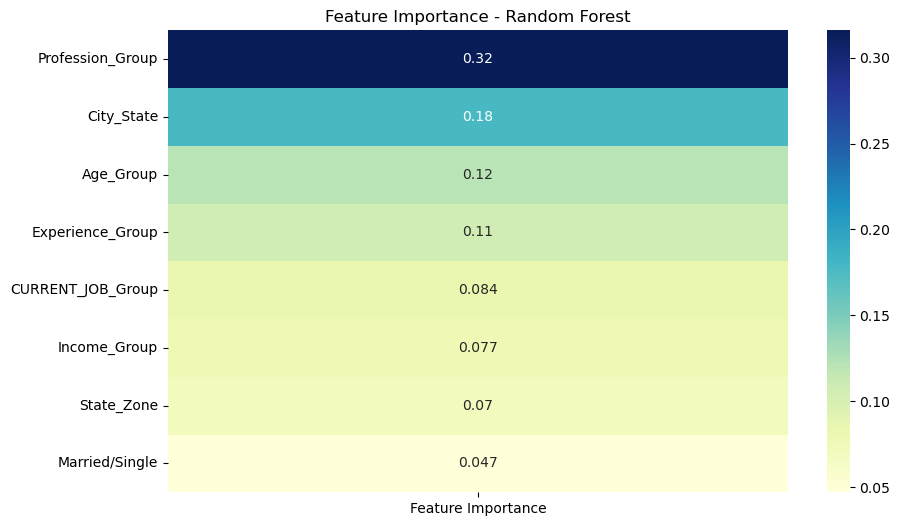

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Melatih model menggunakan data Anda
rf.fit(x1_train, y1_train)

# Mendapatkan tingkat kepentingan fitur dari model Random Forest
feature_importance = rf.feature_importances_

# Membuat DataFrame dengan tingkat kepentingan fitur untuk setiap kolom
fi_df = pd.DataFrame(feature_importance, index=x1_train.columns, columns=['Feature Importance'])

# Mengurutkan tingkat kepentingan fitur dari yang tertinggi ke terendah
fi_df = fi_df.sort_values(by='Feature Importance', ascending=False)

# Membuat heatmap untuk visualisasi tingkat kepentingan fitur
plt.figure(figsize=(10, 6))
sns.heatmap(fi_df, annot=True, cmap='YlGnBu')
plt.title('Feature Importance - Random Forest')
plt.show()

[22:53:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


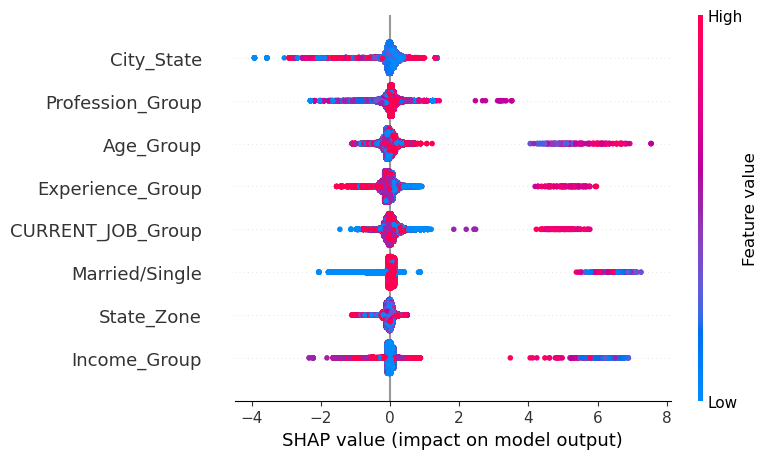

In [74]:
import shap
import xgboost

# Inisialisasi model
model_rf1 = xgboost.XGBClassifier()
model_rf1.fit(x1_train, y1_train)

explainer = shap.Explainer(model_rf1)
shap_values = explainer(x1_test)

shap.summary_plot(shap_values, x1_test)

### **Model Testing Data Group**

In [75]:
import pickle

In [76]:
rf_model = "rf_model.pkl"
with open(rf_model, 'wb') as file:
  pickle.dump(model, file)

In [77]:
with open(rf_model, 'rb') as file:
  pickle_model = pickle.load(file)

In [78]:
from sklearn.ensemble import RandomForestClassifier

pickle_model = RandomForestClassifier()

# fit model ke training dulu
pickle_model.fit(x1_train, y1_train)

# testing data test
score = pickle_model.score(x1_test, y1_test)
print('Test score: {0:.2f} %'.format(100 * score))


Test score: 67.87 %


In [79]:
# testing data train
score = pickle_model.score(x1_train, y1_train)
print('Test score: {0:.2f} %'.format(100 * score))


Test score: 67.99 %


In [81]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming x1_train, y1_train are your training data
# Create and train the RandomForestClassifier
pickle_model = RandomForestClassifier()
pickle_model.fit(x1_train, y1_train)

# Save the trained model to a file in Google Drive
model_filename = "random_forest_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(pickle_model, model_file)

# Display the path to the saved model file
print(f"Model saved to: {model_filename}")


Model saved to: random_forest_model.pkl


### Data Mentah

In [82]:
#split data train & test
from sklearn.model_selection import train_test_split
X = data_mentah.drop('Risk_Flag',axis=1)
y = data_mentah['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
#Memastikan bahwa One-Hot Encoding pada data
combined_data = pd.concat([X_train, X_test])

#Menerapkan One-Hot Encoding pada combined_data
combined_data_encoded = pd.get_dummies(combined_data)

#Memisahkan kembali data pelatihan dan data pengujian setelah One-Hot Encoding
X_train_encoded = combined_data_encoded.iloc[:len(X_train)]
X_test_encoded = combined_data_encoded.iloc[len(X_train):]

In [84]:
#modelling dengan randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

### **Model Testing Data Mentah - Random Forest**

In [85]:
#Test model data mentah
pickle_model = RandomForestClassifier()

# fit model ke training dulu
pickle_model.fit(X_train_encoded, y_train)

# testing
score = pickle_model.score(X_test, y_test)
print('Test score: {0:.2f} %'.format(100 * score))

Test score: 89.89 %


In [86]:
score = pickle_model.score(X_train_encoded, y_train)
print('Test score: {0:.2f} %'.format(100 * score))

Test score: 93.64 %


In [87]:
y_pred = model.predict(X_test_encoded)

In [88]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Akurasi: 0.8985515873015874
Presisi: 0.6026287360460929
Recall: 0.5352630737246122
F1-Score: 0.5669518082493435
AUC-ROC: 0.7426355008915719


In [89]:
#Model evaluation dengan cross validation
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melakukan cross-validation dengan 5 lipatan
scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Rata-rata Akurasi:", scores.mean())

Cross-Validation Scores: [0.89910714 0.90300099 0.90019841 0.89789187 0.89952877]
Rata-rata Akurasi: 0.8999454365079365


In [90]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# Menentukan parameter terbaik
grid_search.fit(X_train_encoded, y_train)

# Menampilkan parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Menampilkan hasil validasi silang pada parameter terbaik
print("F1 score Terbaik:", grid_search.best_score_)

Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
F1 score Terbaik: 0.5685075251318994


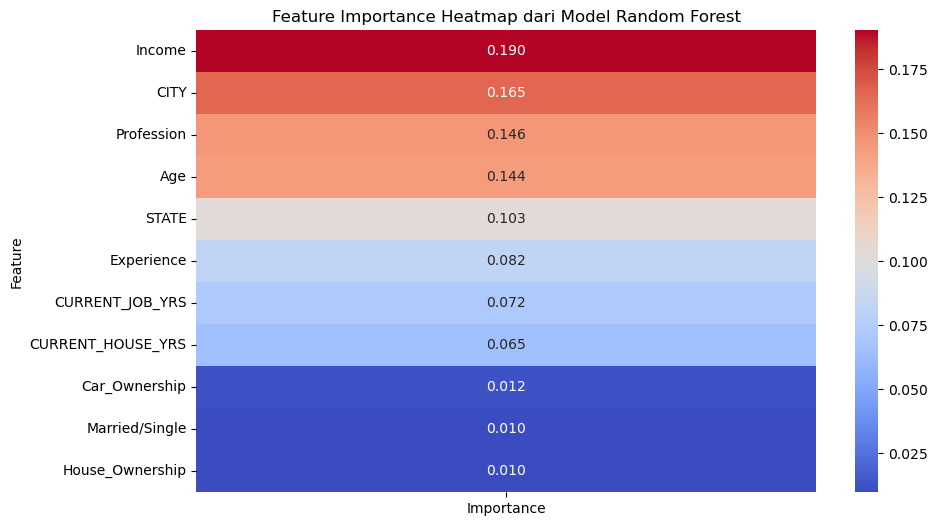

In [91]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Mengambil nilai feature importance
feature_importance = model.feature_importances_

# Mendapatkan nama-nama fitur
feature_names = X_train.columns  # Gantilah X_train dengan DataFrame Anda

# Membuat DataFrame untuk feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mengonversi Importance ke float
feature_importance_df['Importance'] = feature_importance_df['Importance'].astype(float)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=feature_importance_df.set_index('Feature'), annot=True, fmt='.3f', cmap='coolwarm', xticklabels=True)
plt.title('Feature Importance Heatmap dari Model Random Forest')
plt.show()

In [92]:
import shap
import xgboost

In [93]:
# Inisialisasi model
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### **Model Testing Data Group - XGBoost**

In [94]:
#Test model data mentah
pickle_model = xgboost.XGBClassifier()

# fit model ke training dulu
pickle_model.fit(X_train, y_train)

# testing data test
score = pickle_model.score(X_test, y_test)
print('Test score: {0:.2f} %'.format(100 * score))


Test score: 88.90 %


In [95]:
# testing data train
score = pickle_model.score(X_train, y_train)
print('Test score: {0:.2f} %'.format(100 * score))

Test score: 89.64 %


[23:07:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


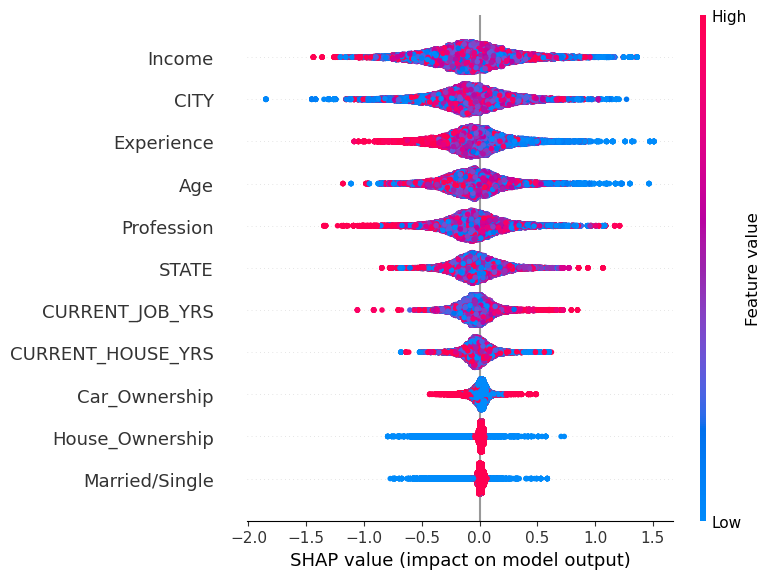

In [96]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)